In [1]:
import pickle
import pandas as pd
import numpy as np
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline 

/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
!ls Datasets/

analysis			    generated_feature_new.pkl
clean_fake_reliable_features__.csv  generated_feature.pkl
clean_fake_reliable_features.csv    generated_feature_targets.pkl
clean_mini.csv			    reliable_mini.csv
clickbait_mini.csv		    rumor_mini.csv
data_kaggle.pkl			    targets_kaggle.pkl
data.pkl			    targets_new.pkl
Fake_clean.csv			    temp_web
fake_mini.csv			    unreliable_mini.csv
generated_feature_kaggle.pkl	    Web_Scrapping


In [3]:
def read_pickle(path):
    objects = []
    with (open(path, "rb")) as openfile:
        while True:
            try:
                objects.append(pickle.load(openfile))
            except EOFError:
                break
    return objects

def get_features_targets(path_features,path_targets):
    features = read_pickle(path_features)
    targets = read_pickle(path_targets)
    return (features[0],targets[0])

def remove_nan_inf(array, change_value=0):
    if np.isnan(array).any():
        pos = np.isnan(array)
        array[pos] = change_value
    if np.isinf(array).any():
        pos = np.isinf(array)
        array[pos] = change_value
    return array

def check_nan_inf(array): 
    return (np.isnan(array).any() or np.isinf(array).any())
    
    
def skfold(X, y, model):
    skf = StratifiedKFold(n_splits=10)
    skf.get_n_splits(X, y)
    results = cross_val_score(model, X, y, cv=skf)
    return results

def print_acc(results,model):
    print("Accuracy of {} is {} and std is {}" .format(model ,results.mean()*100, results.std()*100))


        

### Scrapped Dataset

In [4]:

features_scrapped,targets_scrapped = get_features_targets\
('Datasets/generated_feature.pkl','Datasets/generated_feature_targets.pkl')
X_s = features_scrapped[:2233]
y_s = targets_scrapped['target'][:2233]


In [5]:
check_nan_inf(X_s)


False

In [6]:
xgb_s = skfold(X_s, y_s, xgboost.XGBClassifier());
gnb_s = skfold(X_s, y_s, GaussianNB());
rf_s = skfold(X_s, y_s,RandomForestClassifier());
svc_s = skfold(X_s, y_s,SVC());
ada_s = skfold(X_s, y_s,AdaBoostClassifier());
knn_s = skfold(X_s, y_s,KNeighborsClassifier());
MLPc_s = skfold(X_s, y_s,MLPClassifier());
dic_s = {'XGB':xgb_s, 'RandomForest':rf_s,'SVC':svc_s,'GaussianNB':gnb_s,'adaBoost':ada_s,'KNN':knn_s, 'MLPc':MLPc_s}
dic_s


/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWar

{'GaussianNB': array([0.76785714, 0.74553571, 0.74553571, 0.76233184, 0.71748879,
        0.81165919, 0.77578475, 0.77578475, 0.73991031, 0.79820628]),
 'KNN': array([0.62946429, 0.61607143, 0.62053571, 0.632287  , 0.5470852 ,
        0.67264574, 0.60538117, 0.65470852, 0.61434978, 0.65470852]),
 'MLPc': array([0.61160714, 0.64285714, 0.71875   , 0.53811659, 0.68609865,
        0.65022422, 0.74439462, 0.73542601, 0.7309417 , 0.69058296]),
 'RandomForest': array([0.84375   , 0.86160714, 0.79017857, 0.80269058, 0.78923767,
        0.80269058, 0.8206278 , 0.80269058, 0.78923767, 0.8206278 ]),
 'SVC': array([0.60714286, 0.625     , 0.60714286, 0.632287  , 0.58744395,
        0.67264574, 0.6367713 , 0.65470852, 0.632287  , 0.632287  ]),
 'XGB': array([0.82589286, 0.87053571, 0.87053571, 0.82959641, 0.86098655,
        0.86547085, 0.86098655, 0.85650224, 0.86547085, 0.9103139 ]),
 'adaBoost': array([0.83482143, 0.83482143, 0.79017857, 0.8206278 , 0.8161435 ,
        0.83856502, 0.77130045, 0

In [7]:
11161*.20

2232.2000000000003

Accuracy of XGBOOST is 86.16291639974376 and std is 2.2110328114944067
Accuracy of Random Forest is 81.23338404868674 and std is 2.3214462236992186
Accuracy of SVC  is 62.87716207559257 and std is 2.3144196198428912
Accuracy of gnb  is 76.40094490711083 and std is 2.6762574163168398
Accuracy of adab  is 81.68341607943626 and std is 2.2555045397744653
Accuracy of knn  is 62.4723734785394 and std is 3.282722458681938
Accuracy of mlp  is 67.48999039077515 and std is 6.187009417012802






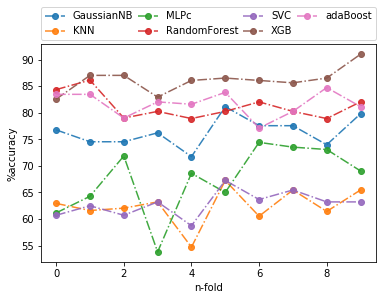

In [27]:
print_acc(xgb_s, 'XGBOOST')
print_acc(rf_s, 'Random Forest')
print_acc(svc_s, 'SVC ')
print_acc(gnb_s, 'gnb ')
print_acc(ada_s, 'adab ')
print_acc(knn_s, 'knn ')
print_acc(MLPc_s, 'mlp ')

print('\n\n\n')

results_s = pd.DataFrame(dic_s).applymap(lambda x: x*100)
results_s.plot(**{'linewidth':1.5, 'linestyle':'-.','marker':'o',\
                     'alpha':.9})
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=4)
plt.xlabel('n-fold')
plt.ylabel('%accuracy')
#plt.savefig('visualization/SKF_scrapped.jpg',dpi=300,format='jpg')

### Kaggle Dataset

In [9]:

features_kaggle,targets_kaggle = get_features_targets\
('Datasets/generated_feature_kaggle.pkl','Datasets/targets_kaggle.pkl')

split = features_kaggle.shape[0]*.20
X_k = features_kaggle[:int(split)]
y_k = targets_kaggle['target'][:int(split)]

In [10]:
split

4160.0

In [11]:
check_nan_inf(X_k)

True

In [12]:
X_k =remove_nan_inf(X_k)
check_nan_inf(X_k)

False

In [13]:
xgb_k = skfold(X_k, y_k, xgboost.XGBClassifier())
gnb_k = skfold(X_k, y_k, GaussianNB())
rf_k = skfold(X_k, y_k,RandomForestClassifier())
svc_k = skfold(X_k, y_k,SVC())
ada_k = skfold(X_k, y_k,AdaBoostClassifier())
knn_k = skfold(X_k, y_k,KNeighborsClassifier())
MLPc_k = skfold(X_k, y_k,MLPClassifier())
dic_k = {'XGB':xgb_k, 'RandomForest':rf_k,'SVC':svc_k,'GaussianNB':gnb_k,'adaBoost':ada_k,'KNN':knn_k, 'MLPc':MLPc_k}
dic_k


/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWar

{'GaussianNB': array([0.74820144, 0.75779376, 0.75721154, 0.75480769, 0.73798077,
        0.74038462, 0.75240385, 0.77403846, 0.74216867, 0.75903614]),
 'KNN': array([0.72661871, 0.7146283 , 0.73798077, 0.70673077, 0.73076923,
        0.70913462, 0.74038462, 0.72596154, 0.71084337, 0.75180723]),
 'MLPc': array([0.64508393, 0.78417266, 0.86057692, 0.87259615, 0.58653846,
        0.81730769, 0.85576923, 0.88221154, 0.84337349, 0.88915663]),
 'RandomForest': array([0.86570743, 0.86570743, 0.88942308, 0.87740385, 0.87259615,
        0.83173077, 0.83894231, 0.87740385, 0.85783133, 0.88674699]),
 'SVC': array([0.62829736, 0.64748201, 0.60336538, 0.65144231, 0.65144231,
        0.63461538, 0.65384615, 0.64663462, 0.62168675, 0.61686747]),
 'XGB': array([0.91606715, 0.90647482, 0.91586538, 0.93509615, 0.92548077,
        0.88461538, 0.87740385, 0.92067308, 0.90843373, 0.91566265]),
 'adaBoost': array([0.88489209, 0.90167866, 0.89423077, 0.91105769, 0.90865385,
        0.85576923, 0.86057692, 0

Accuracy of XGBOOST is 91.05772967353643 and std is 1.6748431703415354
Accuracy of Random Forest is 86.63493181358527 and std is 1.8041229992198462
Accuracy of SVC  is 63.55679747212426 and std is 1.6539857959887458
Accuracy of gnb  is 75.24026946190962 and std is 1.0222003603748984
Accuracy of adab  is 89.25524635898326 and std is 1.8752012227964594
Accuracy of knn  is 72.54859143269259 and std is 1.4323894207125203
Accuracy of mlp  is 80.36786715206148 and std is 9.930680954259628






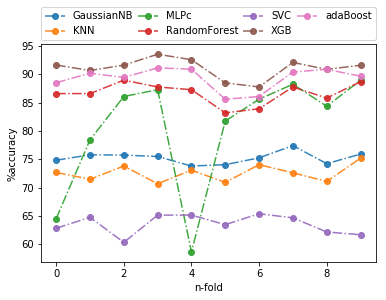

In [26]:
print_acc(xgb_k, 'XGBOOST')
print_acc(rf_k, 'Random Forest')
print_acc(svc_k, 'SVC ')
print_acc(gnb_k, 'gnb ')
print_acc(ada_k, 'adab ')
print_acc(knn_k, 'knn ')
print_acc(MLPc_k, 'mlp ')

print('\n\n\n')


results_k = pd.DataFrame(dic_k).applymap(lambda x: x*100)
results_k.plot(**{'linewidth':1.5, 'linestyle':'-.','marker':'o',\
                     'alpha':.9})
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=4)
plt.xlabel('n-fold')
plt.ylabel('%accuracy')
#plt.savefig('visualization/SKF_kaggle.jpg',dpi=300,format='jpg')

### Third Dataset

In [15]:

features_third,targets_third = get_features_targets\
('Datasets/generated_feature_new.pkl','Datasets/targets_new.pkl')
split = features_third.shape[0]*.20
X_n = features_third[:int(split)]
y_n = targets_third['target'][:int(split)]


In [16]:
check_nan_inf(X_n)

True

In [17]:
X_n = remove_nan_inf(X_n)
check_nan_inf(X_n)

False

In [18]:
X_n.shape

(1267, 163)

In [19]:
xgb_n = skfold(X_n, y_n, xgboost.XGBClassifier());
gnb_n = skfold(X_n, y_n, GaussianNB());
rf_n = skfold(X_n, y_n,RandomForestClassifier());
svc_n = skfold(X_n, y_n,SVC());
ada_n = skfold(X_n, y_n,AdaBoostClassifier());
knn_n = skfold(X_n, y_n,KNeighborsClassifier());
MLPc_n = skfold(X_n, y_n,MLPClassifier());
dic_n = {'XGB':xgb_n, 'RandomForest':rf_n,'SVC':svc_n,'GaussianNB':gnb_n,'adaBoost':ada_n,'KNN':knn_n, 'MLPc':MLPc_n}
dic_n

/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWar

{'GaussianNB': array([0.7578125 , 0.703125  , 0.75      , 0.72440945, 0.6984127 ,
        0.70634921, 0.73015873, 0.79365079, 0.73015873, 0.73015873]),
 'KNN': array([0.7265625 , 0.6171875 , 0.640625  , 0.62204724, 0.63492063,
        0.69047619, 0.63492063, 0.65873016, 0.5952381 , 0.65873016]),
 'MLPc': array([0.78125   , 0.75      , 0.6953125 , 0.64566929, 0.75396825,
        0.80952381, 0.72222222, 0.77777778, 0.61111111, 0.78571429]),
 'RandomForest': array([0.8828125 , 0.859375  , 0.84375   , 0.80314961, 0.82539683,
        0.79365079, 0.76984127, 0.80952381, 0.81746032, 0.81746032]),
 'SVC': array([0.671875  , 0.5546875 , 0.671875  , 0.62204724, 0.61904762,
        0.61904762, 0.61111111, 0.64285714, 0.54761905, 0.63492063]),
 'XGB': array([0.8828125 , 0.9140625 , 0.8671875 , 0.83464567, 0.85714286,
        0.84126984, 0.88095238, 0.8968254 , 0.84920635, 0.9047619 ]),
 'adaBoost': array([0.828125  , 0.8515625 , 0.8828125 , 0.81889764, 0.82539683,
        0.78571429, 0.83333333, 0

Accuracy of XGBOOST is 87.28866899450068 and std is 2.5983117158456146
Accuracy of Random Forest is 82.22420439632545 and std is 3.1073278858564657
Accuracy of SVC  is 61.95087918697663 and std is 3.9641436980256737
Accuracy of gnb  is 73.24235837707786 and std is 2.734398332515593
Accuracy of adab  is 83.73461129858765 and std is 2.753015502088182
Accuracy of knn  is 64.79438117110361 and std is 3.6069153998027548
Accuracy of mlp  is 73.32549251656043 and std is 6.141325678641924






<Figure size 1800x1800 with 0 Axes>

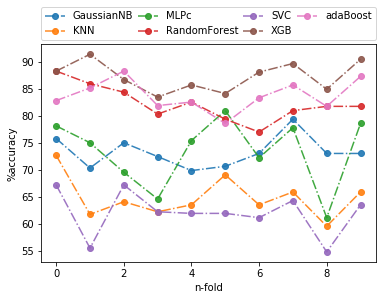

In [25]:
print_acc(xgb_n, 'XGBOOST')
print_acc(rf_n, 'Random Forest')
print_acc(svc_n, 'SVC ')
print_acc(gnb_n, 'gnb ')
print_acc(ada_n, 'adab ')
print_acc(knn_n, 'knn ')
print_acc(MLPc_n, 'mlp ')

print('\n\n\n')

results_n = pd.DataFrame(dic_n).applymap(lambda x: x*100)

plt.figure(figsize=(25,25))
results_n.plot(**{'linewidth':1.5, 'linestyle':'-.','marker':'o',\
                     'alpha':.9,'figsize':(6,4)})

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=4)
plt.xlabel('n-fold')
plt.ylabel('%accuracy')
#plt.savefig('visualization/SKF_third_d.jpg',dpi=300,format='jpg')